## 1. Preparation

In [32]:
import pandas as pd
import kagglehub 
import matplotlib.pyplot as plt
import os
import plotly.express as px

In [33]:
# Download latest version
path = kagglehub.dataset_download("kyanyoga/sample-sales-data")

print("Path to dataset files:", path)

Path to dataset files: /home/gitpod/.cache/kagglehub/datasets/kyanyoga/sample-sales-data/versions/1


In [34]:
all_files = os.listdir('/home/gitpod/.cache/kagglehub/datasets/kyanyoga/sample-sales-data/versions/1')
for file in all_files:
    print(file)

sales_data_sample.csv


In [35]:
raw = pd.read_csv(
    '/home/gitpod/.cache/kagglehub/datasets/kyanyoga/sample-sales-data/versions/1/sales_data_sample.csv',
    encoding='latin1'
)

## 2. Explore the data

In [36]:
# Drop unnecessary columns

to_drop = ['ADDRESSLINE1','ADDRESSLINE2','STATE','POSTALCODE','TERRITORY','PHONE','CONTACTLASTNAME','CONTACTFIRSTNAME']
raw = raw.drop(to_drop, axis = 1)

In [37]:
# Change data type of ORDERDATE to datetime type

raw['ORDERDATE'] = pd.to_datetime(raw['ORDERDATE'])

In [38]:
# Summary stats of Quantitative variables

quantitive_vars = ['QUANTITYORDERED','PRICEEACH', 'SALES','MSRP']
describe_quantitive_vars = raw[quantitive_vars].describe()
describe_quantitive_vars.style.background_gradient(cmap = "Blues")

,QUANTITYORDERED,PRICEEACH,SALES,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000
mean,35.092809,83.658544,3553.889072,100.715551
std,9.741443,20.174277,1841.865106,40.187912
min,6.000000,26.880000,482.130000,33.000000
25%,27.000000,68.860000,2203.430000,68.000000
50%,35.000000,95.700000,3184.800000,99.000000
75%,43.000000,100.000000,4508.000000,124.000000
max,97.000000,100.000000,14082.800000,214.000000


## 3. Analyze and Visualize Data

### 3.1. Annual Revenue

In [39]:
# Annual Revenue
annual_revenue = pd.DataFrame(raw.groupby(['YEAR_ID'])['SALES'].sum()).reset_index()
annual_revenue.style.background_gradient(cmap = "Blues")

,YEAR_ID,SALES
0,2003,3516979.540000
1,2004,4724162.600000
2,2005,1791486.710000


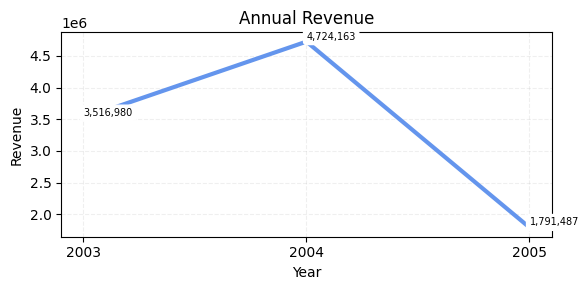

In [98]:
# Plot Chart for Annual Revenue
fig, ax = plt.subplots(figsize=(6, 3))

year = annual_revenue['YEAR_ID'].tolist()
sales = annual_revenue['SALES'].tolist()

plt.plot(
    year, #
    sales, 
    color="#6495ED",
    linewidth = 3
)

for x, y in zip(year, sales):
    plt.text(
        x, y , f'{y:,.0f}', 
        ha='left', 
        va='bottom', 
        fontsize=7,
        bbox=dict(facecolor='white', edgecolor='white', boxstyle='round')
                 )
    
plt.title("Annual Revenue")
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.xticks(year)
plt.grid(True, linestyle='--', alpha=0.2)
plt.tight_layout()
plt.show()


# matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)

### 3.2. Monthly Revenue

In [99]:
# Monthly Revenue
monthly_revenue = pd.DataFrame(raw.groupby(['YEAR_ID','MONTH_ID'])['SALES'].sum()).reset_index()

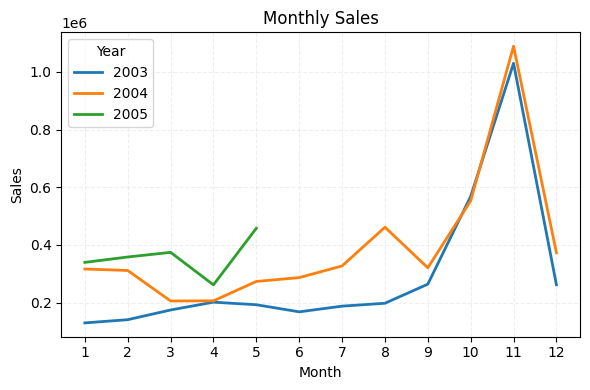

In [100]:

fig, ax = plt.subplots(figsize = (6,4))

for year in monthly_revenue['YEAR_ID'].unique():
    yearly_data = monthly_revenue[monthly_revenue['YEAR_ID'] == year]
    plt.plot(
        yearly_data['MONTH_ID'], 
        yearly_data['SALES'], 
        label=str(year),
        linewidth = 2
    )

plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(range(1, 13)) 
plt.legend(title='Year')
plt.grid(True, linestyle = '--', alpha = 0.2)
plt.tight_layout()

plt.show()

### 3.3. Sales by Country

In [106]:
sales_by_country = pd.DataFrame(raw.groupby(['COUNTRY'])['SALES'].sum()).reset_index()
sales_by_country.sort_value(by = "SALES", ascending = False)

AttributeError: 'DataFrame' object has no attribute 'sort_value'

In [101]:
raw.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,COUNTRY,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,NYC,USA,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,Reims,France,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,Paris,France,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,Pasadena,USA,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,San Francisco,USA,Medium
